In [3]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST, CelebA
from torchvision import transforms
from torch.utils.data import DataLoader

import id_gan
from id_gan.vae import VAE

In [2]:
!mkdir -p data/celeba
!wget -O data/celeba/img_align_celeba.zip https://cseweb.ucsd.edu/~weijian/static/datasets/celeba/img_align_celeba.zip

--2023-05-08 05:01:29--  https://cseweb.ucsd.edu/~weijian/static/datasets/celeba/img_align_celeba.zip
Resolving cseweb.ucsd.edu (cseweb.ucsd.edu)... 132.239.8.30
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘data/celeba/img_align_celeba.zip’

data/celeba/img_ali 100%[===================>]   1.34G  19.4MB/s    in 39s     

2023-05-08 05:02:08 (35.7 MB/s) - ‘data/celeba/img_align_celeba.zip’ saved [1443490838/1443490838]



In [3]:
image_transforms = transforms.Compose([ # Augmentation
    transforms.RandomRotation(30),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Resize((32, 32), antialias=True),
    transforms.Normalize(mean=(0.1307, ), std=(0.3081, ))
])

dataset = MNIST('./data', train=True, transform=image_transforms, download=True)
# dataset = CelebA("./data", transform=image_transforms, download=True)

data_loader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=False
)

sample, _ = next(iter(data_loader))
sample.shape

torch.Size([4, 1, 32, 32])

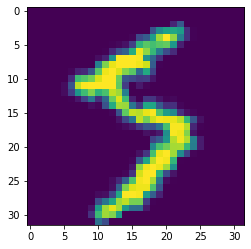

In [4]:
plt.imshow(sample[0, 0].numpy())

In [ ]:
import id_gan
import matplotlib.pyplot as plt

results = id_gan.train_vae("celeba", batch_size=512, num_workers=8, epochs=5)
plt.plot(results["loss"])

Using device cuda
Files already downloaded and verified


[epoch 0] loss = 4739.9212:   3%|▎         | 48/1590 [00:20<06:58,  3.69it/s] 

In [2]:
import id_gan
import matplotlib.pyplot as plt

vae = id_gan.load_vae("celeba")

Loading VAE model from output/celeba_vae.pt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


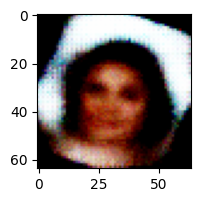

In [9]:
img = vae.sample(1)[0].numpy().transpose(1, 2, 0)

plt.figure(figsize=(2, 2))
plt.imshow(img)